In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [3]:
digits = datasets.load_digits()

In [5]:
X = digits.data
y = digits.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [15]:
print(f"RandomForest Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

RandomForest Model Accuracy: 97.22%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



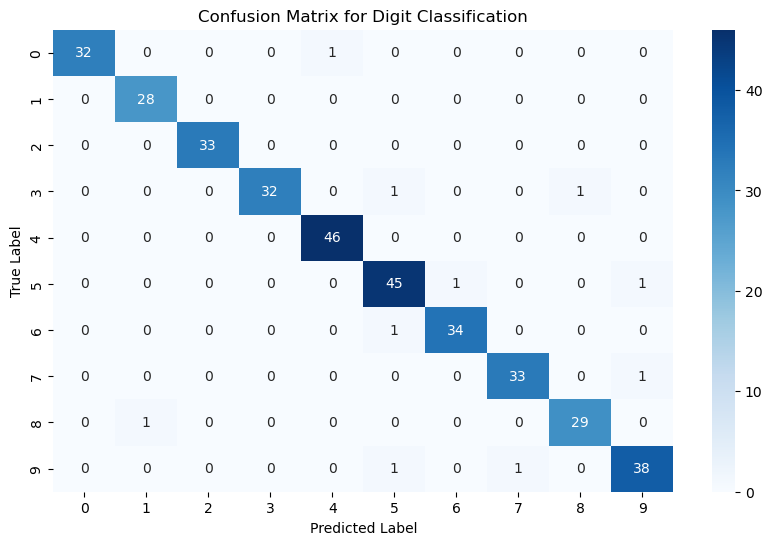

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix for Digit Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

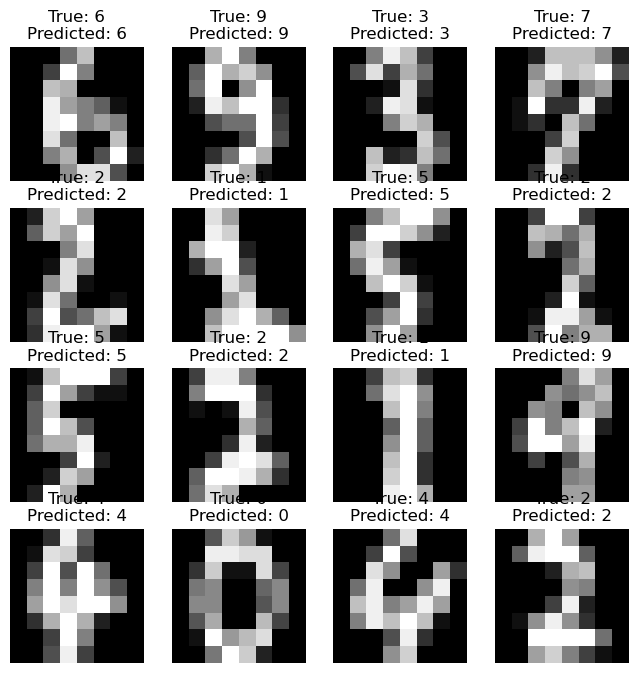

In [19]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')
plt.show()

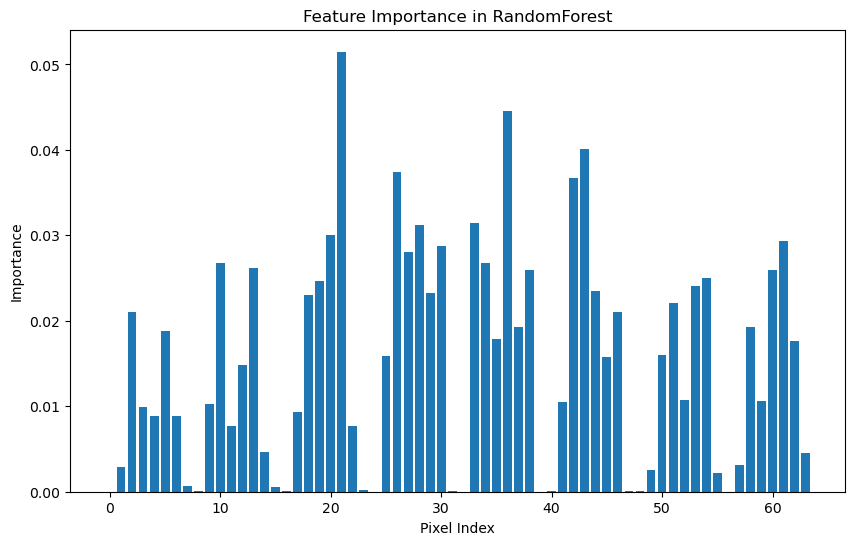

In [21]:
plt.figure(figsize=(10, 6))
feature_importances = rf_model.feature_importances_
plt.bar(np.arange(len(feature_importances)), feature_importances)
plt.title('Feature Importance in RandomForest')
plt.xlabel('Pixel Index')
plt.ylabel('Importance')
plt.show()

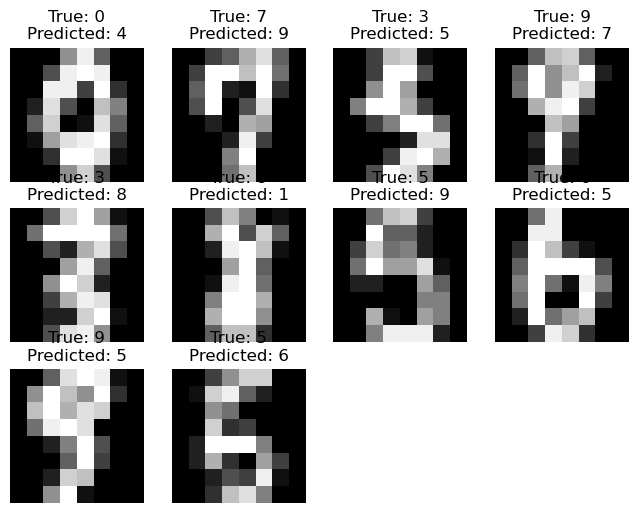

In [23]:
plt.figure(figsize=(8, 8))
misclassified = np.where(y_test != y_pred)[0]
for i, idx in enumerate(misclassified[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPredicted: {y_pred[idx]}")
    plt.axis('off')
plt.show()

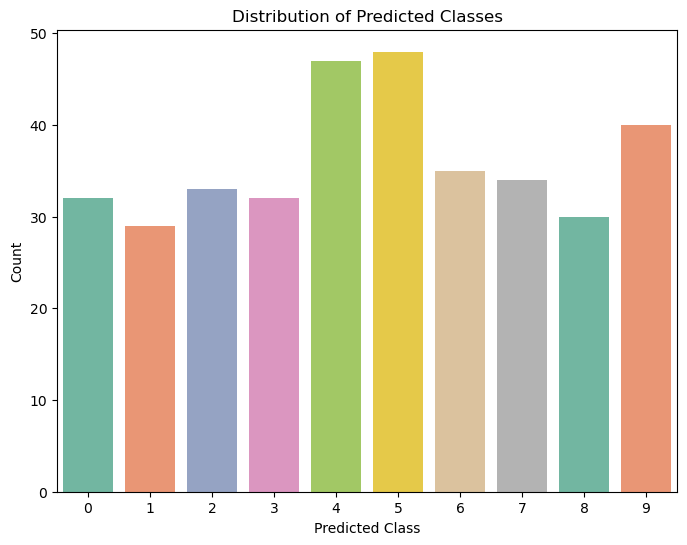

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, hue=y_pred, palette='Set2', dodge=False, legend=False)

plt.title('Distribution of Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()